In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('../data/user_fake_authentic_4class.csv')
x = df[['pos', 'cs', 'cl', 'erc', 'erl']]  # flg
# pos: Number of total posts that the user has ever posted
# cs: Average cosine similarity of between all pair of two posts a user has
# cl: The average number of character of captions in media
# erc: (num comments) divide by (num media) divide by (num followers)
y_org = df['class']
y = y_org.copy()
y[y == 'a'] = 0
y[y == 'i'] = 1
y[y == 'r'] = 2
y[y == 's'] = 3
y = y.astype(np.int64)

print(x.shape)
print(y.value_counts())

(43307, 5)
0    12054
1    10549
2    10441
3    10263
Name: class, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 train_size=.75,
                                                 test_size=.25,
                                                 stratify=y, # maintain label proportions
                                                 random_state=0
                                                )

print(x_test.shape)
print(y_test.value_counts())

(10827, 5)
0    3014
1    2637
2    2610
3    2566
Name: class, dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

In [6]:
# f1 as evaluation metric
from sklearn.metrics import accuracy_score, classification_report

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(x_train, y_train)

y_pred_gbc = gbc.predict(x_test)
print(accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

0.6251962685877898
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      3014
           1       0.54      0.99      0.70      2637
           2       0.77      0.18      0.29      2610
           3       0.77      0.71      0.74      2566

    accuracy                           0.63     10827
   macro avg       0.68      0.62      0.59     10827
weighted avg       0.67      0.63      0.59     10827



In [27]:
y_train_d = pd.get_dummies(y_train, drop_first=True)
print(y_train)
print(y_train_d)
y_test_d = pd.get_dummies(y_test)
gbc1 = GradientBoostingClassifier(n_estimators=10)
gbc1.fit(x_train, y_train_d)

y_pred_gbc1 = gbc1.predict(x_test)
print(accuracy_score(y_test, y_pred_gbc1))
print(classification_report(y_test, y_pred_gbc1))

28950    0
4933     2
40133    0
35177    1
9811     2
        ..
28959    0
22794    3
16134    3
16316    3
1462     2
Name: class, Length: 32480, dtype: int64
       1  2  3
28950  0  0  0
4933   0  1  0
40133  0  0  0
35177  1  0  0
9811   0  1  0
...   .. .. ..
28959  0  0  0
22794  0  0  1
16134  0  0  1
16316  0  0  1
1462   0  1  0

[32480 rows x 3 columns]


ValueError: y should be a 1d array, got an array of shape (32480, 3) instead.

In [8]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(multi_class='ovr', # default
                          max_iter=1000)     # to avoid timeout errors
logr.fit(x_train, y_train)

y_pred_logr = logr.predict(x_test)
print(accuracy_score(y_test, y_pred_logr))
print(classification_report(y_test, y_pred_logr))

0.5177796250115452
              precision    recall  f1-score   support

           0       0.48      0.73      0.58      3014
           1       0.51      0.94      0.66      2637
           2       0.76      0.14      0.23      2610
           3       0.62      0.23      0.33      2566

    accuracy                           0.52     10827
   macro avg       0.59      0.51      0.45     10827
weighted avg       0.59      0.52      0.46     10827



In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.6287983744342847
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      3014
           1       0.68      0.89      0.77      2637
           2       0.61      0.27      0.37      2610
           3       0.65      0.67      0.66      2566

    accuracy                           0.63     10827
   macro avg       0.63      0.63      0.61     10827
weighted avg       0.63      0.63      0.61     10827



In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc_md5 = DecisionTreeClassifier(max_depth=5) # max_depth: max number of questions
dtc_md5.fit(x_train, y_train)

y_pred_dtc_md5 = dtc_md5.predict(x_test)
print(accuracy_score(y_test, y_pred_dtc_md5))
print(classification_report(y_test, y_pred_dtc_md5))

0.6066315692250854
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      3014
           1       0.56      0.95      0.70      2637
           2       0.64      0.29      0.40      2610
           3       0.68      0.68      0.68      2566

    accuracy                           0.61     10827
   macro avg       0.62      0.61      0.58     10827
weighted avg       0.62      0.61      0.58     10827



In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, # number of trees in ensemble
                             n_jobs=-1,       # parallelize using all available cores
                             random_state=0   # for demonstration only
                            )
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

0.5567562575043872
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      3014
           1       0.54      0.97      0.69      2637
           2       0.56      0.21      0.31      2610
           3       0.58      0.71      0.63      2566

    accuracy                           0.56     10827
   macro avg       0.56      0.56      0.52     10827
weighted avg       0.56      0.56      0.52     10827



In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred_ada = ada.predict(x_test)
print(accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

0.47677103537452664
              precision    recall  f1-score   support

           0       0.42      0.53      0.47      3014
           1       0.51      0.90      0.65      2637
           2       0.20      0.09      0.13      2610
           3       0.78      0.37      0.50      2566

    accuracy                           0.48     10827
   macro avg       0.48      0.47      0.44     10827
weighted avg       0.48      0.48      0.44     10827



In [13]:
# evaluation
from sklearn.model_selection import cross_val_score
cross_val_score(gbc, x_train, y_train, cv=3, scoring="accuracy")

# from sklearn.model_selection import cross_val_score
# cross_val_score(gbc, x_train, y_train, cv=3, scoring="f1")

array([0.76336935, 0.76577076, 0.76741179])

[[9916  160 1938   40]
 [ 273 9544  695   37]
 [1609 1126 5956 1750]
 [2023  219  832 7189]]


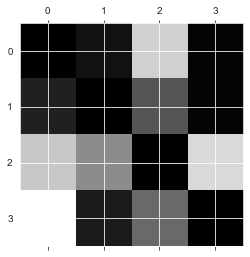

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(gbc, x, y, cv=3)
cm = confusion_matrix(y, y_pred)
print(cm)

row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [15]:
# print('Precisions:')
# print(f'for 0: {(cm.iloc[0,0] / sum(cm.iloc[:,0])):.3f}')
# print(f'for 1: {(cm.iloc[1,1] / sum(cm.iloc[:,1])):.3f}')
# print(f'for 2: {(cm.iloc[2,2] / sum(cm.iloc[:,2])):.3f}')
# print(f'for 3: {(cm.iloc[3,3] / sum(cm.iloc[:,3])):.3f}')

print('Recalls:')
# print(f'for 0: {(cm.iloc[0,0] / sum(cm.iloc[0,:])):.3f}')
print(f'factive fake user: {(cm[1,1] / sum(cm[1,:])):.3f}')
print(f'inactive fake user: {(cm[2,2] / sum(cm[2,:])):.3f}')
print(f'spammer fake user: {(cm[3,3] / sum(cm[3,:])):.3f}')

Recalls:
factive fake user: 0.905
inactive fake user: 0.570
spammer fake user: 0.700


In [16]:
print('Inactive fake user is misclassified.')

Inactive fake user is misclassified.


In [17]:
print(gbc.feature_importances_)

[0.37974755 0.09690667 0.32284323 0.13534112 0.06516142]


In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(10, 300, 10),
    'learning_rate': [0.01, 0.05, 0.1, 1]
}
classes = y_train.unique()

In [28]:
grid_clf = GridSearchCV(estimator=gbc, scoring='f1_weighted', param_grid=params, cv=5)
grid_clf.fit(x_train, y_train)

print("The best parameters are: ", grid_clf.best_params_)

The best parameters are:  {'learning_rate': 0.1, 'n_estimators': 130}


In [1]:
y_pred_grid = grid_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

NameError: name 'grid_clf' is not defined